# Regression Final Project

#### Almat Sergazyyev

## Introduction

In short, there are 9 features that affect on the price of diamonds. There are three categorical variables:
<ul>
    <li>cut: ideal, premium, very good, good, fair</li>
    <li>color: from J to D, from worst to best</li>
    <li>clarity: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF, from worst to best</li>
</ul>
There are two variables measured in percents:
<ul>
    <li>depth</li>
    <li>table</li>
</ul>
Also there are three variables describing dimension of diamond:
<ul>
    <li>x: length</li>
    <li>y: width</li>
    <li>z: depth</li>
</ul>
And the last variable that defines the value of diamond:
<ul>
    <li>carat</li>
</ul>

Here is the link to the dataset: [forest fires](https://archive.ics.uci.edu/ml/datasets/Forest+Fires)

## Data Preparation

In [ ]:
diamonds = read.csv("C:/Users/sergazyyev/Desktop/diamonds.csv")

In [ ]:
head(diamonds)

X,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


Notice that there is a column which is simple indexing. Let us remove it 

In [ ]:
diamonds <- diamonds[-c(1)]

In [ ]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [ ]:
length(diamonds$x)

[1] 53940

Since my R crushes when I use all the data, I decided to randomly choose 500 observations.

In [ ]:
library(dplyr)

In [ ]:
diamonds_reduced <- sample_n(diamonds,500)

In [ ]:
length(diamonds_reduced$x)

[1] 500

In ML class project, there were some faulty data in this dataset. Let me check if they present in reduced dataset

In [ ]:
diamonds_reduced <- diamonds_reduced[which(diamonds_reduced$x > 0),]
diamonds_reduced <- diamonds_reduced[which(diamonds_reduced$y > 0),]
diamonds_reduced <- diamonds_reduced[which(diamonds_reduced$z > 0),]

In [ ]:
length(diamonds_reduced$x)

[1] 500

We were lucky and have no faulty data. 

## Model Building

In [ ]:
model1 = lm(price ~ carat + color + cut + x + y + z + depth + table + clarity,data = diamonds_reduced)

In [ ]:
summary(model1)


Call:
lm(formula = price ~ carat + color + cut + x + y + z + depth + 
    table + clarity, data = diamonds_reduced)

Residuals:
    Min      1Q  Median      3Q     Max 
-3598.5  -551.5  -140.7   336.4  4529.1 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.348e+03  8.960e+03   0.262  0.79344    
carat         1.171e+04  4.928e+02  23.767  < 2e-16 ***
colorE       -3.465e+01  1.727e+02  -0.201  0.84110    
colorF       -2.556e+01  1.661e+02  -0.154  0.87777    
colorG       -4.403e+02  1.621e+02  -2.716  0.00685 ** 
colorH       -9.133e+02  1.730e+02  -5.280 1.96e-07 ***
colorI       -1.374e+03  1.867e+02  -7.361 8.10e-13 ***
colorJ       -2.353e+03  2.422e+02  -9.712  < 2e-16 ***
cutGood       3.892e+02  3.450e+02   1.128  0.25987    
cutIdeal      8.042e+02  3.494e+02   2.302  0.02178 *  
cutPremium    6.727e+02  3.344e+02   2.012  0.04480 *  
cutVery Good  8.178e+02  3.408e+02   2.400  0.01678 *  
x            -1.411e+03  1.191e+03  -1.184  0.

## Checking Model Assumptions

### Linearity

In [ ]:
options(repr.plot.width=4, repr.plot.height=3)

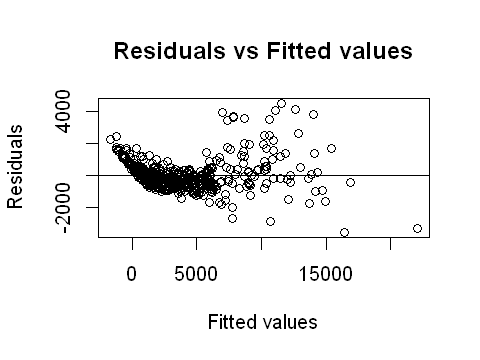

In [ ]:
plot(model1$residuals ~ model1$fitted, main = 'Residuals vs Fitted values', xlab = 'Fitted values', ylab = 'Residuals')
abline(h = 0)

I think linearity is not satisfied. But let us check it with another plot.

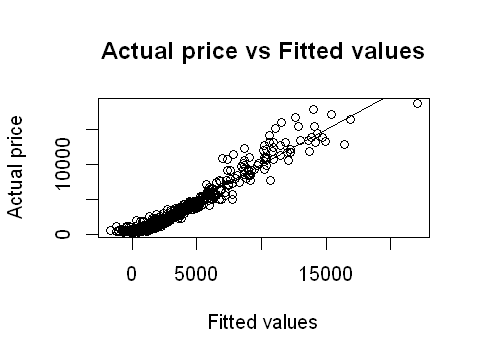

In [ ]:
plot(diamonds_reduced$price ~ model1$fitted, main = 'Actual price vs Fitted values', xlab = 'Fitted values', ylab = 'Actual price')
abline(0,1)

We observe that points more or less follow the diagonal meaning that linearity is satisfied. Let us move further

### Normality

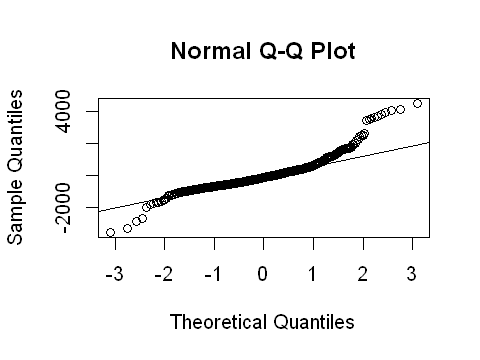

In [ ]:
qqnorm(model1$residuals)
qqline(model1$residuals)

I think normality is not satisfied, according to the graph

In [ ]:
shapiro.test(model1$residuals)


	Shapiro-Wilk normality test

data:  model1$residuals
W = 0.88096, p-value < 2.2e-16


Since p-value is less than any reasonable significance level, Shapiro-Wilk test also concludes normality is not satisfied

### Independence

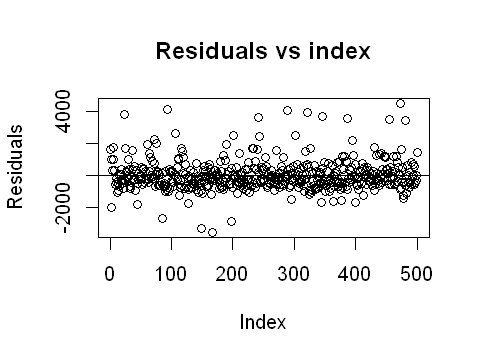

In [ ]:
plot(model1$residuals, main = 'Residuals vs index', ylab = 'Residuals')
abline(h = 0)

There is no pattern, so independence assumption holds

### Constant variance

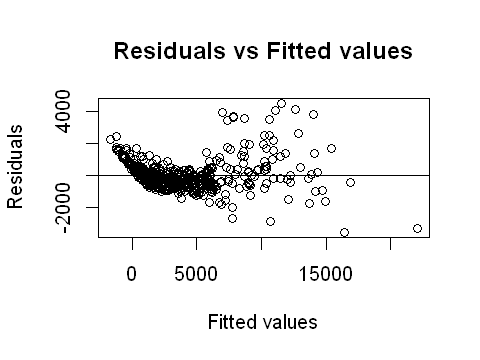

In [ ]:
plot(model1$residuals ~ model1$fitted, main = 'Residuals vs Fitted values', xlab = 'Fitted values', ylab = 'Residuals')
abline(h = 0)

Distances from horizontal line to points are not the same but let us check through Breusch-Pagan test

In [ ]:
library(lmtest)

In [ ]:
bptest(model1)


	studentized Breusch-Pagan test

data:  model1
BP = 110.44, df = 23, p-value = 2.11e-13


We are interested in testing the null hypothesis of constant variance versus the alternative hypothesis of nonconstant variance.<br/>
$H_{0}$: constant variance<br>
$H_{a}$: nonconstant variance <br>
Decision rule : If p-value is less than $\alpha=0.05$, then we reject null hypothesis.<br>
Conclusion: Since p-value is less than chosen significance level, we reject null hypothesis. So, constant variance is not satisfied

## Improving the model

### Box-Cox transformation

In [ ]:
library(MASS)

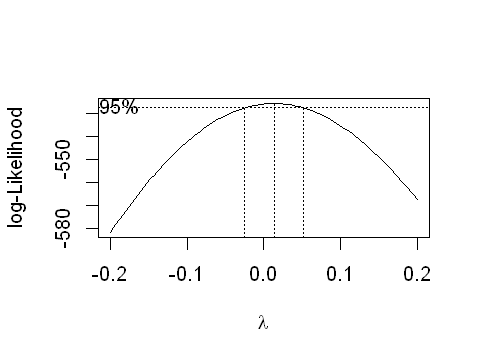

In [ ]:
options(repr.plot.width=4, repr.plot.height=3)
boxcox(model1, plotit = TRUE, lambda = seq(-0.2, 0.2, by = 0.05))

In [ ]:
price_trans = (diamonds_reduced$price^(0.05)-1)*20

In [ ]:
model2 = lm(price_trans ~ diamonds_reduced$carat + diamonds_reduced$color + diamonds_reduced$cut + 
            diamonds_reduced$x + diamonds_reduced$y + diamonds_reduced$z + 
            diamonds_reduced$depth + diamonds_reduced$table + diamonds_reduced$clarity)

In [ ]:
summary(model2)


Call:
lm(formula = price_trans ~ diamonds_reduced$carat + diamonds_reduced$color + 
    diamonds_reduced$cut + diamonds_reduced$x + diamonds_reduced$y + 
    diamonds_reduced$z + diamonds_reduced$depth + diamonds_reduced$table + 
    diamonds_reduced$clarity)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.64935 -0.11955 -0.00185  0.11232  0.63946 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -0.195966   1.789320  -0.110 0.912836    
diamonds_reduced$carat        -1.162450   0.098415 -11.812  < 2e-16 ***
diamonds_reduced$colorE       -0.086913   0.034490  -2.520 0.012063 *  
diamonds_reduced$colorF       -0.153973   0.033177  -4.641 4.49e-06 ***
diamonds_reduced$colorG       -0.237323   0.032370  -7.332 9.84e-13 ***
diamonds_reduced$colorH       -0.408731   0.034540 -11.834  < 2e-16 ***
diamonds_reduced$colorI       -0.565389   0.037275 -15.168  < 2e-16 ***
diamonds_reduced$colorJ       -0.757055   0.

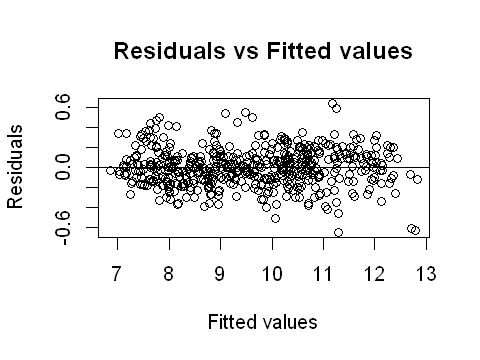

In [ ]:
plot(model2$residuals ~ model2$fitted, main = 'Residuals vs Fitted values', xlab = 'Fitted values', ylab = 'Residuals')
abline(h = 0)

This plot suggests that linearity and constant variance assumptions hold. Let us quickly check homogenuity of variance by Breusch-Pagan test

In [ ]:
bptest(model2)


	studentized Breusch-Pagan test

data:  model2
BP = 19.896, df = 23, p-value = 0.6482


Under any reasonable significance level, we fail to reject null hypothesis: constant variance. Hence, constant variance is satisfied

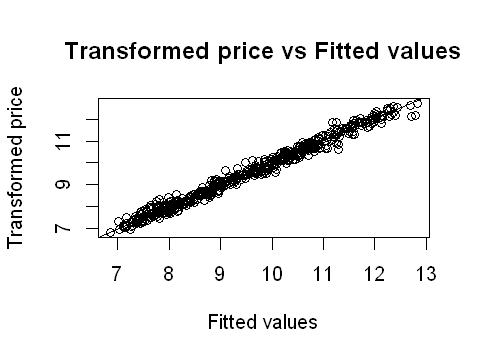

In [ ]:
plot(price_trans ~ model2$fitted, main = 'Transformed price vs Fitted values', xlab = 'Fitted values', ylab = 'Transformed price')
abline(0,1)

Now linearity is clearly satisfied

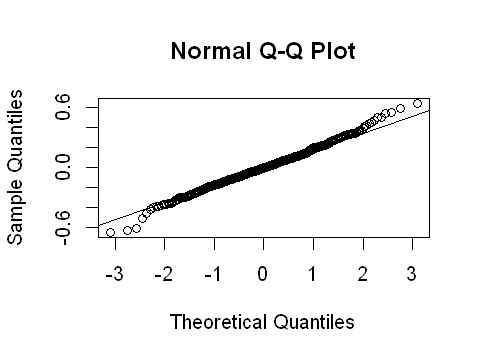

In [ ]:
qqnorm(model2$residuals)
qqline(model2$residuals)

In [ ]:
shapiro.test(model2$residuals)


	Shapiro-Wilk normality test

data:  model2$residuals
W = 0.99454, p-value = 0.07223


Under 0.05 signficance level, we fail to reject null hypothesis: normality of residuals. Hence, normality assumption holds

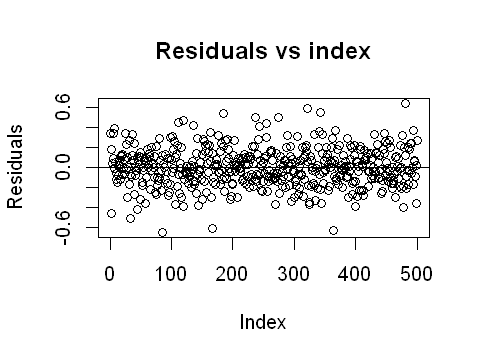

In [ ]:
plot(model2$residuals, main = 'Residuals vs index', ylab = 'Residuals')
abline(h = 0)

Box-Cox transformation solved all the problems with model assumptions!

### Removing Outliers using DFFITS

In [ ]:
threshold = 1

In [ ]:
dffits_m = abs(dffits(model2))

In [ ]:
diamonds_reduced_more <- diamonds_reduced[which(dffits_m < threshold),]

In [ ]:
head(diamonds_reduced_more)

carat,cut,color,clarity,depth,table,price,x,y,z
0.34,Ideal,I,SI1,62.3,55,589,4.47,4.42,2.77
1.31,Premium,I,VS1,61.9,56,5759,7.07,6.98,4.35
0.71,Very Good,I,SI2,63.7,57,1875,5.64,5.67,3.60
0.74,Good,F,VVS1,58.4,60,4336,6.03,6.06,3.53
0.56,Premium,G,SI2,60.0,60,1208,5.48,5.42,3.11
0.31,Very Good,I,SI1,63.5,56,523,4.32,4.28,2.73


In [ ]:
length(diamonds_reduced_more$x)

[1] 497

Using DFFITS we removed 3 points from dataset

In [ ]:
price_trans = (diamonds_reduced_more$price^(0.05)-1)*20

In [ ]:
model3 = lm(price_trans ~ diamonds_reduced_more$carat + diamonds_reduced_more$color + diamonds_reduced_more$cut + 
            diamonds_reduced_more$x + diamonds_reduced_more$y + diamonds_reduced_more$z + 
            diamonds_reduced_more$depth + diamonds_reduced_more$table + diamonds_reduced_more$clarity)

In [ ]:
summary(model3)


Call:
lm(formula = price_trans ~ diamonds_reduced_more$carat + diamonds_reduced_more$color + 
    diamonds_reduced_more$cut + diamonds_reduced_more$x + diamonds_reduced_more$y + 
    diamonds_reduced_more$z + diamonds_reduced_more$depth + diamonds_reduced_more$table + 
    diamonds_reduced_more$clarity)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6742 -0.1144 -0.0085  0.1116  0.6223 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        -4.420597   2.107943  -2.097  0.03651 *  
diamonds_reduced_more$carat        -1.162882   0.096044 -12.108  < 2e-16 ***
diamonds_reduced_more$colorE       -0.097159   0.033723  -2.881  0.00414 ** 
diamonds_reduced_more$colorF       -0.154875   0.032371  -4.784 2.30e-06 ***
diamonds_reduced_more$colorG       -0.237372   0.031580  -7.517 2.84e-13 ***
diamonds_reduced_more$colorH       -0.415511   0.033866 -12.269  < 2e-16 ***
diamonds_reduced_more$colorI       -0.567537  

Adjusted R-squared increased slightly, only by 0.0009 (from 0.9822 to 0.9831). So, removing outliers did not greatly affect on the regression model

### Multicollinearity

In [ ]:
library(car)

Loading required package: carData

Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode



In [ ]:
vif(model3)

,GVIF,Df,GVIF^(1/(2*Df))
diamonds_reduced_more$carat,26.726357,1,5.169754
diamonds_reduced_more$color,1.413920,6,1.029284
diamonds_reduced_more$cut,2.828364,4,1.138785
diamonds_reduced_more$x,962.959957,1,31.031596
diamonds_reduced_more$y,980.249386,1,31.308935
diamonds_reduced_more$z,1593.098330,1,39.913636
diamonds_reduced_more$depth,31.249253,1,5.590103
diamonds_reduced_more$table,2.125420,1,1.457882
diamonds_reduced_more$clarity,1.558671,7,1.032210


We observe that x, y, z dimensions are highly involved in multicollinearity because their VIF values are much greater than 10

In ML project, we integrated those dimensions into one variable. Let us apply this method here

In [ ]:
dim = diamonds_reduced_more$x + diamonds_reduced_more$y + diamonds_reduced_more$z

In [ ]:
model4 = lm(price_trans ~ diamonds_reduced_more$carat + diamonds_reduced_more$color + diamonds_reduced_more$cut + dim +
            diamonds_reduced_more$depth + diamonds_reduced_more$table + diamonds_reduced_more$clarity)

In [ ]:
vif(model4)

,GVIF,Df,GVIF^(1/(2*Df))
diamonds_reduced_more$carat,26.627349,1,5.160169
diamonds_reduced_more$color,1.404423,6,1.028707
diamonds_reduced_more$cut,2.226434,4,1.105226
dim,26.515161,1,5.149287
diamonds_reduced_more$depth,1.306319,1,1.142943
diamonds_reduced_more$table,2.069116,1,1.438442
diamonds_reduced_more$clarity,1.498093,7,1.029292


So, no variables are involved in multicollinearity, but we lose interpretability of coefficents

In [ ]:
summary(model4)


Call:
lm(formula = price_trans ~ diamonds_reduced_more$carat + diamonds_reduced_more$color + 
    diamonds_reduced_more$cut + dim + diamonds_reduced_more$depth + 
    diamonds_reduced_more$table + diamonds_reduced_more$clarity)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.70230 -0.11357 -0.01076  0.11053  0.62505 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        -6.218587   0.659399  -9.431  < 2e-16 ***
diamonds_reduced_more$carat        -1.167219   0.095778 -12.187  < 2e-16 ***
diamonds_reduced_more$colorE       -0.096128   0.033664  -2.856 0.004485 ** 
diamonds_reduced_more$colorF       -0.153927   0.032328  -4.761 2.56e-06 ***
diamonds_reduced_more$colorG       -0.237184   0.031550  -7.518 2.80e-13 ***
diamonds_reduced_more$colorH       -0.413800   0.033797 -12.244  < 2e-16 ***
diamonds_reduced_more$colorI       -0.565710   0.036285 -15.591  < 2e-16 ***
diamonds_reduced_more$colorJ       -

Adjusted R-squared did not even change. Now let us compare the original model and the one that has no collinear variables

### Comparison of models

In [ ]:
AIC(model3)

[1] -217.187

In [ ]:
AIC(model4)

[1] -219.9976

According to AIC, second model (no collinear variables) is better

In [ ]:
BIC(model3)

[1] -111.9723

In [ ]:
BIC(model4)

[1] -123.2

According to BIC, second model is also better

AIC and BIC say that model with no collinear variables is better, while the drop in Adjusted R-squared is insignifant. So we choose the second model

### Significance of predictors in the second model

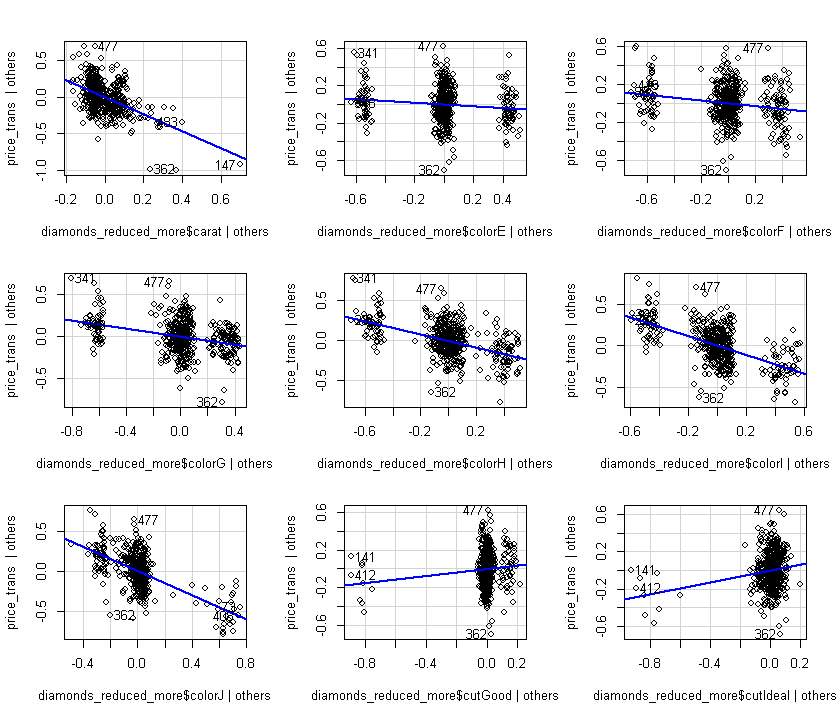

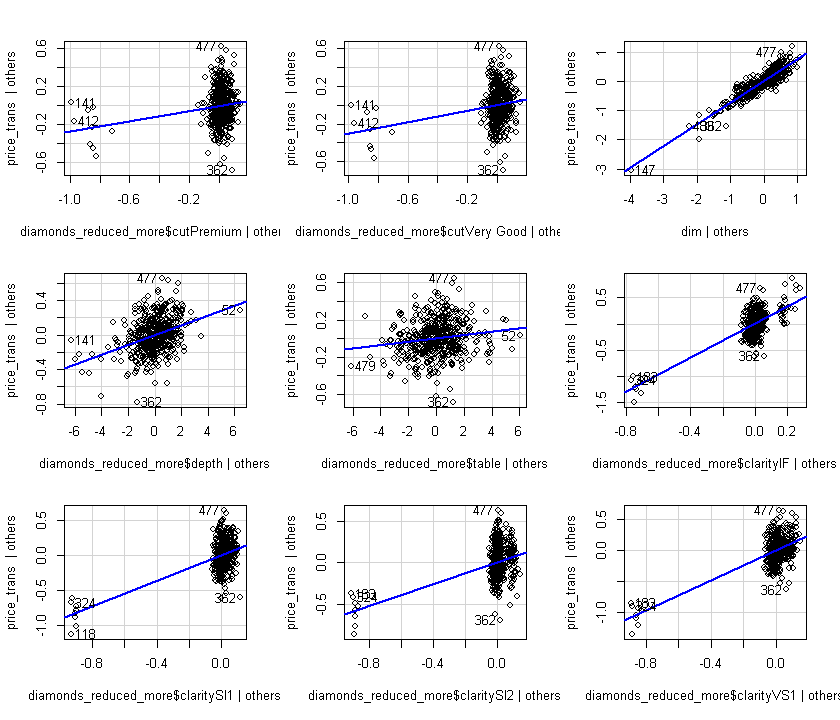

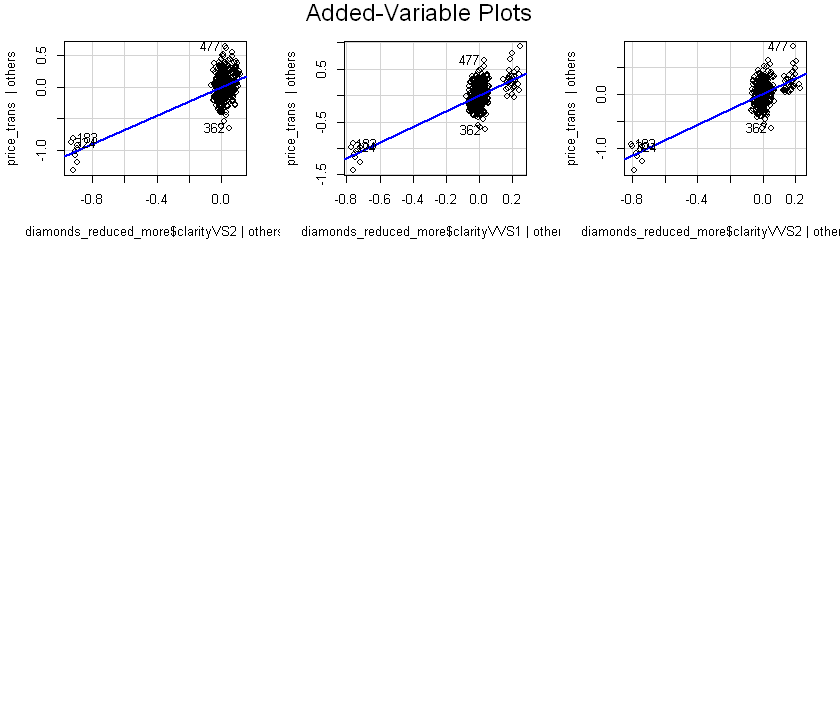

In [ ]:
options(repr.plot.width=7, repr.plot.height=6)
avPlots(model4)

Added variable plots do not arise any problems, so each predictor is worth to be present in the model

## Conclusion

Finally, the model (that has no collinear variables) is as follows:

$y = -6.21 -1.167219x_1-0.09[I = color E] -0.15[I = color F] -0.23[I = color G] - 0.41[I = color H] -0.56[I = color I] -0.75[I = color J] +  0.18[I = cut Good] + 0.31[I = cut Ideal] + 0.26[I = cut Premium] + 0.29[I = cut Very Good] + 0.73x_2 + 0.05x_3+ 0.01x_4 +  1.62[I = clarity IF] +  0.9[I = clarity SI1] +  0.65[I = clarity SI2] + 1.20[I = clarity VS1] + 1.12[I = clarity VS2] + 1.49[I = clarity VVS1] + 1.41[I = clarity VVS2]$

where 
- $x_1$ is carat
- $x_2$ is dim (x + y + z)
- $x_3$ is depth
- $x_4$ is table

I used Box-Cox transformation that solved all the problems with model assumptions. So there was no need to apply WLS (because variance was constant after Box-Cox). Also, I simply integrated three variables into one which I called dimension because it contains sum of length, width, and height of diamonds. So there was no need to apply ridge regression because multicollinearity problem was solved by this simple method. Then I removed some outliers based only on DFFITS because Cook's distance method gave huge number of outliers. After comparison of models with $x, y, z$ and with $dim$ based on AIC and BIC, we came to the conclusion that model with no collinear variables is better. I did not focus on predictors in this project but I used Added Variable Plots that show relation between transformed price and predictors. It shows that each predictor has linear relationship with transformed price and each predictor is significant

## Further Improvement

I could pay more attention to the predictors. Find outliers in predictors. But I trusted those predictors very much because I did similar work in ML project, so that there was no problem with them. I could add interaction terms and analyze if they are necessary, but I did not see any correlation that would tell there is interaction between variables. 